In [10]:
# LOADING THE UTILS MODULE
import sys
import os
import json

# Add the project's root directory to the Python path to ensure 'utils' can be imported.
try:
    # Assumes the notebook is in 'labs/Day_01_.../'
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    # Fallback for different execution environments
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_completion, save_artifact, clean_llm_output

# Initialize the LLM client. You can change the model here.
# For example: setup_llm_client(model_name="gemini-2.5-flash")
client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")

✅ LLM Client configured: Using 'openai' with model 'gpt-4o'


In [ ]:
# PRD GENERATION

client, model_name, api_provider = setup_llm_client(model_name="gpt-4.1")
problem_statement = "We need to create RAG powered documentation chatbot for CUDA."
# This prompt is direct and open-ended, encouraging the LLM to be creative.
features_prompt = f"""
Based on the problem statement: '{problem_statement}', brainstorm basic, minimum viable features and user stories for a RAG chatbot for CUDA. 
Format the output as a simple markdown list.
"""

print("--- Brainstorming content ---")
brainstormed_content = get_completion(features_prompt, client, model_name, api_provider)
print(brainstormed_content)

prd_prompt = f"""You are a product manager tasked with creating a Product Requirements Document (PRD) for a web-based RAG-Powered 
Documentation Chatbot. This chatbot uses a Retrieval-Augmented Generation (RAG) backend to answer questions about the 
official CUDA C++ Programming Guide, specifically to help new developers learn and solve problems related to CUDA programming.

Please provide a detailed PRD that includes the following sections:

1. **Introduction**: Overview of the project and its objectives.
2. **User Stories**: Describe the key user stories that the chatbot should support.
3. **Functional Requirements**: We will have these features: Natural language query handling, retrieval of relevant information from a knowledge source, and generation of concise, user-friendly responses.

Make the PRD clear, actionable, and tailored for a technical audience interested in CUDA development.
"""

simple_prd_output = get_completion(prd_prompt, client, model_name, api_provider)
print(simple_prd_output)
save_artifact(simple_prd_output, "artifacts/prd.md")


--- Brainstorming content ---
### Minimum Viable Features for a RAG-Powered Documentation Chatbot for CUDA

1. **Natural Language Processing (NLP) Capabilities**
   - Ability to understand and interpret user queries about CUDA.
   - Support for synonyms and technical jargon related to CUDA.

2. **Document Retrieval and Processing**
   - Integration with CUDA documentation and relevant resources.
   - Efficient retrieval of relevant information from large datasets.

3. **Answer Generation**
   - Generation of concise and accurate responses based on retrieved information.
   - Ability to synthesize information from multiple documents to provide comprehensive answers.

4. **Real-Time Interaction**
   - Quick response time to user queries.
   - Continuous learning from user interactions to improve response accuracy.

5. **User-Friendly Interface**
   - Chat interface that is intuitive and easy to navigate.
   - Support for both text and voice input.

6. **Contextual Understanding**
   - Ma

✅ LLM Client configured: Using 'openai' with model 'gpt-4.1'
--- Generating Component Diagram ---

--- Generated PlantUML Code ---
@startuml
' Define components
package "Web-Based RAG-Powered Documentation Chatbot" {
  
  [User Interface (UI)] as UI
  [Backend Service (API Server)] as Backend
  [Database/Document Store] as DB
  [Language Model (LLM)] as LLM

  ' Relationships
  UI -down-> Backend : 1. Sends user queries\n3. Receives responses
  Backend -left-> DB : 4. Retrieves documents\n& stores chat history
  Backend -right-> LLM : 5. Calls for response\ngeneration
}

@enduml
✅ Diagram rendered and saved to: artifacts/component_diagram.png


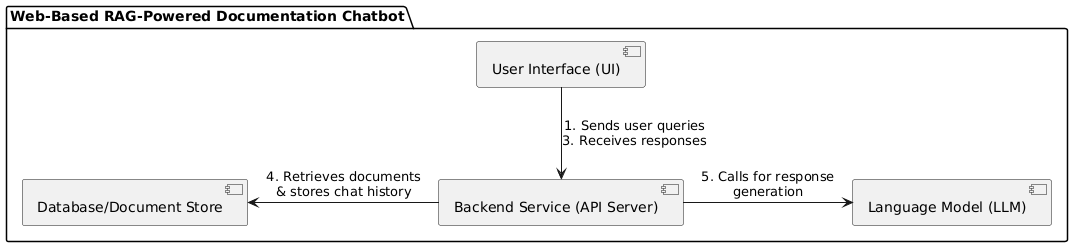

In [ ]:
# ARCHITECTURAL DOCUMENT & DIAGRAM
client, model_name, api_provider = setup_llm_client(model_name="gpt-4.1")
from utils import render_plantuml_diagram, load_artifact, clean_llm_output

component_diagram_prompt = """
You are an expert system architect. Generate PlantUML code for a component diagram illustrating 
the architecture of a web-based RAG-Powered Documentation Chatbot.

Components:

1. User Interface (UI): The web front-end where users interact with the chatbot.

2. Backend Service (API Server): Handles requests from the UI, processes queries, and coordinates retrieval and response generation.

3. Database or Document Store: Stores the knowledge base (e.g., CUDA documentation) and chat history.

4. Language Model (LLM): Uses a language model to generate responses based on the retrieved information.

Relationships:
1. The User Interface (UI) sends user queries to the Backend Service.
2. The Backend Service receives queries, interacts with the Database/Document Store to retrieve relevant information, and calls the language model for response generation.
3. The Backend Service returns the generated response to the UI for display to the user.
4. The Database/Document Store is accessed by the Backend Service for storing chat history, retrieving documents, and managing knowledge sources.
5. The Language Model (LLM) is accessed by the Backend Service for response generation.

Output only the raw PlantUML code inside a markdown block.
"""

print("--- Generating Component Diagram ---")
component_puml_raw = get_completion(component_diagram_prompt, client, model_name, api_provider)
component_puml = clean_llm_output(component_puml_raw, language='plantuml')

print("\n--- Generated PlantUML Code ---")
print(component_puml)

# Render the diagram

if component_puml:
    render_plantuml_diagram(component_puml, "artifacts/component_diagram.png")

In [ ]:
# ADR

client, model_name, api_provider = setup_llm_client(model_name="gemini-2.5-pro")

adr_template_prompt = """ You are an expert in software architecture and design. 
Create a markdown template for an Architectural Decision Record (ADR) in markdown format.
The template should include the following sections:
Title: A concise title for the decision.
Status: The status of the decision (e.g., Proposed, Accepted, Deprecated).
Context: The context or background that led to this decision.
Decision: The actual decision that was made.
Consequences: The consequences or implications of the decision.

Output should only be the markdown template without any additional text or explanations."""

print("--- Generating ADR Template ---")
adr_template_content = get_completion(adr_template_prompt, client, model_name, api_provider)
print(adr_template_content)

# Save the artifact
if adr_template_content:
    save_artifact(adr_template_content, "templates/adr_template.md")

db_research_prompt = """ Act as an unbiased expert in database systems. We are building a web-based RAG-Powered Documentation Chatbot that will use a vector database to store and retrieve information from the CUDA C++ Programming Guide.
Use this PRD as context:
{simple_prd_output}

Objectively compare and contrast two technical options: **"Using SQLite "** versus **"Using FAISS"**.
Output should only include the comparison and not include any additional text or explanations."""

print("--- Researching Database Options ---")
db_research_output = get_completion(db_research_prompt, client, model_name, api_provider)
print(db_research_output)

adr_template = load_artifact("templates/adr_template.md")

# TODO: Write a prompt to synthesize the final ADR.
synthesis_prompt = f"""
You are a Staff Engineer and an expert in software architecture and design.
Using the following ADR template:

{adr_template}

And the research findings:

{db_research_output}

Synthesize the final ADR. Make sure to document the decision-making process clearly, including the context, decision, and consequences.
Ensure that the ADR is well-structured and follows best practices for documenting architectural decisions.
Output should only include the comparison and not include any additional text or explanations."""


print("--- Synthesizing Final ADR ---")
if adr_template and 'db_research_output' in locals() and db_research_output:
    final_adr = get_completion(synthesis_prompt, client, model_name, api_provider)
    print(final_adr)
    save_artifact(final_adr, "artifacts/adr.md")
else:
    print("Skipping ADR synthesis because template or research is missing.")


✅ LLM Client configured: Using 'gemini' with model 'gemini-2.5-pro'
--- Generating ADR Template ---
```markdown
# [ADR Number]. [Title of Decision]

## Status

[Proposed | Accepted | Deprecated | Superseded]

## Context

[Describe the context and problem statement that led to this decision. This should include the forces at play, constraints, and assumptions. What is the issue that we're seeing that is motivating this decision or change?]

## Decision

[State the decision that was made. This should be a clear and concise statement of the change being made. For example, "We will use a PostgreSQL database for our primary data store."]

## Consequences

[Describe the consequences of this decision, both positive and negative. This includes trade-offs, impact on other parts of the system, performance implications, and any follow-up work required. What becomes easier or harder to do because of this change?]
```
✅ Successfully saved artifact to: templates/adr_template.md
--- Researching Datab

In [44]:
# SCHEMA GENERATION
from utils import render_plantuml_diagram, load_artifact, clean_llm_output
client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")

prd_content = load_artifact("artifacts/prd.md")

schema_prompt = f"""
You are an expert Database Administrator (DBA).

Based on the following Product Requirements Document (PRD), design a normalized SQL schema for a SQLite database.
The schema should include at most 4 tables for minimum viable product.

**PRD Context:**
<prd>
{prd_content}
</prd>

Output only the raw SQL `CREATE TABLE` statements.
"""

print("--- Generating SQL Schema ---")
if prd_content:
    generated_schema = get_completion(schema_prompt, client, model_name, api_provider)
    
    # Clean up the generated schema
    cleaned_schema = clean_llm_output(generated_schema, language='sql')
    print(cleaned_schema)
    
    # Save the cleaned schema to a file
    save_artifact(cleaned_schema, "artifacts/schema.sql")
else:
    print("Skipping schema generation because PRD is missing.")
    cleaned_schema = ""

✅ LLM Client configured: Using 'openai' with model 'gpt-4o'
--- Generating SQL Schema ---
CREATE TABLE Users (
    user_id INTEGER PRIMARY KEY AUTOINCREMENT,
    user_role TEXT NOT NULL CHECK(user_role IN ('New Developer', 'Developer', 'Experienced Developer'))
);

CREATE TABLE Queries (
    query_id INTEGER PRIMARY KEY AUTOINCREMENT,
    user_id INTEGER NOT NULL,
    query_text TEXT NOT NULL,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);

CREATE TABLE Documents (
    document_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    content TEXT NOT NULL,
    version TEXT NOT NULL,
    last_updated DATETIME DEFAULT CURRENT_TIMESTAMP
);

CREATE TABLE Responses (
    response_id INTEGER PRIMARY KEY AUTOINCREMENT,
    query_id INTEGER NOT NULL,
    response_text TEXT NOT NULL,
    rating INTEGER CHECK(rating BETWEEN 1 AND 5),
    FOREIGN KEY (query_id) REFERENCES Queries(query_id)
);
✅ Successfully saved artifact to: art

In [45]:
# BACKEND CODE GENERATION
import sys
import os

# Add the project's root directory to the Python path to ensure 'utils' can be imported.
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_completion, save_artifact, load_artifact, clean_llm_output

client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")


sql_schema = load_artifact("artifacts/schema.sql")
if not sql_schema:
    print("Warning: Could not load schema.sql. Lab may not function correctly.")

code_prompt = f"""
You are a Python expert specializing in FastAPI and SQLAlchemy.

Based on the provided SQL schema

**SQL Schema Context:**
```sql
{sql_schema}
```

Please provide three separate, well-commented code blocks:

1.  **Pydantic Models:** Create the Pydantic models for the tables.
2.  **SQLAlchemy Models:** Create the SQLAlchemy models for the tables.
3.  **FastAPI Application:** Generate the simple FastAPI application with full CRUD endpoints for the models.

Only output the raw Python code.
"""

print("--- Generating Code ---")
if sql_schema:
    generated_code = get_completion(code_prompt, client, model_name, api_provider)
    print("\n--- Generated Code ---")
    print(generated_code)
else:
    print("Skipping DB code generation because schema is missing.")

#PROMPTED TO GENERATE BACKEND CODE

✅ LLM Client configured: Using 'openai' with model 'gpt-4o'
--- Generating Code ---

--- Generated Code ---
```python
# Pydantic Models
from pydantic import BaseModel, Field
from datetime import datetime
from typing import Optional

class UserBase(BaseModel):
    user_role: str = Field(..., regex="^(New Developer|Developer|Experienced Developer)$")

class UserCreate(UserBase):
    pass

class User(UserBase):
    user_id: int

    class Config:
        orm_mode = True

class QueryBase(BaseModel):
    user_id: int
    query_text: str

class QueryCreate(QueryBase):
    pass

class Query(QueryBase):
    query_id: int
    timestamp: datetime

    class Config:
        orm_mode = True

class DocumentBase(BaseModel):
    title: str
    content: str
    version: str

class DocumentCreate(DocumentBase):
    pass

class Document(DocumentBase):
    document_id: int
    last_updated: datetime

    class Config:
        orm_mode = True

class ResponseBase(BaseModel):
    query_id: int
    response_

In [ ]:
# CREATE TESTS

import sys
import os

# Add the project's root directory to the Python path to ensure 'utils' can be imported.
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_completion, save_artifact, load_artifact, clean_llm_output

client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")

# Load the application code to provide context for test generation
app_code = load_artifact("main.py")
if not app_code:
    print("Warning: Could not load main.py. Lab may not function correctly.")

happy_path_tests_prompt = f"""
You are a Senior QA Engineer writing tests for a FastAPI application using pytest.

Based on the application code provided below, please generate two 'happy path' test functions in a single Python script:
1. A test named `test_create_document` for the `POST /documents/` endpoint. It should create a document and assert that the status code is 200 and the response title matches the input.
2. A test named `test_read_documents` for the `GET /documents/` endpoint. It should first create a document and then assert the status code is 200 and that the response is a list containing at least one document.
3. A test named `test_create_chat_history` for the `POST /chat_history/` endpoint. It should create a chat history and assert that the status code is 200 and the response query matches the input.
4. A test named `test_read_chat_history` for the `GET /chat_history/` endpoint. It should first create a chat history and then assert the status code is 200 and that the response is a list containing at least one chat history.

**Application Code Context:**
```python
{app_code}
```

Your response should be only the raw Python code for the tests.
"""

print("--- Generating Happy Path Tests ---")
if app_code:
    generated_happy_path_tests = get_completion(happy_path_tests_prompt, client, model_name, api_provider)
    cleaned_tests = clean_llm_output(generated_happy_path_tests, language='python')
    print(cleaned_tests)
    save_artifact(cleaned_tests, "tests/happy_path_tests.py")
else:
    print("Skipping test generation because app code is missing.")

edge_case_tests_prompt = f"""
You are a QA Engineer focused on identifying edge cases.

Based on the FastAPI application code provided, write two test functions for common error scenarios:
1.  A test named `test_read_document_not_found` that attempts to GET a document with an ID that does not exist (e.g., 999). It must assert that the API returns a 404 status code.
2.  A test named `test_read_chat_history_not_found` that attempts to GET a chat history with an ID that does not exist (e.g., 999). It must assert that the API returns a 404 status code.

**Application Code Context:**
```python
{app_code}
```

Output only the raw Python code for the tests.
"""

print("--- Generating Edge Case Tests ---")
if app_code:
    generated_edge_case_tests = get_completion(edge_case_tests_prompt, client, model_name, api_provider)
    cleaned_edge_case_tests = clean_llm_output(generated_edge_case_tests, language='python')
    print(cleaned_edge_case_tests)  
    save_artifact(cleaned_edge_case_tests, "tests/edge_case_tests.py")
else:
    print("Skipping test generation because app code is missing.")

✅ LLM Client configured: Using 'openai' with model 'gpt-4o'
--- Generating Happy Path Tests ---
import pytest
from fastapi.testclient import TestClient
from main import app

client = TestClient(app)

def test_create_document():
    # Given
    document_data = {
        "title": "CUDA Programming Guide",
        "content": "This is a guide to CUDA programming.",
        "source_url": "http://example.com/cuda-guide"
    }

    # When
    response = client.post("/api/v1/documents/upload", json=document_data)

    # Then
    assert response.status_code == 200
    response_data = response.json()
    assert response_data["title"] == document_data["title"]

def test_read_documents():
    # First create a document
    document_data = {
        "title": "CUDA Programming Guide",
        "content": "This is a guide to CUDA programming.",
        "source_url": "http://example.com/cuda-guide"
    }
    client.post("/api/v1/documents/upload", json=document_data)

    # When
    response = client.ge

In [60]:
# CREATE FRONTEND CODE
from fileinput import filename
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_completion, save_artifact, clean_llm_output
from IPython.display import Image, display, Code, Markdown

# Ensure you select a vision-capable model
client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")

if not model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")


screenshot_url = "https://i.ibb.co/gFb08jXz/screenshot.png"
display(Image(url=screenshot_url))

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS.

Your task is to analyze the provided image of a login form and write the code for a single, self-contained React component that accurately replicates its design and layout.

**Requirements:**
- Use functional components.
- Use Tailwind CSS for all styling. Do not use custom CSS or style tags.
- Make sure the component is accessible, using appropriate HTML tags and attributes.
- The output should be only the raw JSX code for the component.
"""

print("--- Generating Monolithic UI Component ---")
generated_monolithic_code = ""
if model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, screenshot_url, client, model_name, api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "artifacts/component.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")


frontend_prompt = f"""
You are a software engineer tasked with creating a frontend for the FastAPI application.

Based on the provided component, create a frontend application for RAG powered documentation chatbot for CUDA.

**Component Context:**
![Component](component.jsx)

Output only the raw React code for the frontend.
"""

print("--- Generating Frontend Code ---")
generated_frontend_code = get_completion(frontend_prompt, client, model_name, api_provider)
print(generated_frontend_code)

# CREATE FRONTEND CODE USING LLM


✅ LLM Client configured: Using 'openai' with model 'gpt-4o'


--- Generating Monolithic UI Component ---


import React from 'react';

const CudaChatbot = () => {
  return (
    <div className="flex flex-col items-center justify-center min-h-screen bg-gray-100">
      <h1 className="text-4xl font-bold text-gray-800 mb-2">
        CUDA Documentation Chatbot
      </h1>
      <p className="text-gray-600 mb-6">Ask questions about CUDA</p>
      <div className="bg-white rounded-lg shadow-lg p-4 max-w-xl w-full">
        <div className="bg-gray-200 p-3 rounded-lg text-gray-700 mb-4">
          Hello! I am your CUDA documentation assistant. Ask me anything about CUDA programming.
        </div>
        <div className="flex items-center">
          <input
            type="text"
            placeholder="Type your CUDA question..."
            className="flex-grow p-2 rounded-l-full border border-gray-300 focus:outline-none focus:ring-2 focus:ring-blue-400"
          />
          <button className="bg-blue-500 text-white p-2 rounded-r-full hover:bg-blue-600 focus:outline-none focus:ring-2 focus:ring-blue-400">
            Send
          </button>
        </div>
      </div>
    </div>
  );
};

export default CudaChatbot;

✅ Successfully saved artifact to: artifacts/component.jsx
--- Generating Frontend Code ---
Certainly! Below is a basic example of a React frontend application for a RAG-powered documentation chatbot for CUDA. This example assumes a simple chat interface that connects to a FastAPI backend.

```jsx
import React, { useState } from 'react';
import './App.css';

function App() {
  const [input, setInput] = useState('');
  const [messages, setMessages] = useState([]);

  const handleInputChange = (event) => {
    setInput(event.target.value);
  };

  const handleSend = async () => {
    if (!input) return;

    const userMessage = { sender: 'user', text: input };
    setMessages([...messages, userMessage]);

    setInput('');

    // Send the input to the FastAPI backend
    try {
      const response = await fetch('http://localhost:8000/chat', {
        method: 'POST',
        headers: {
          'Content-Type': 'application/json',
        },
        body: JSON.stringify({ message: input }

In [ ]:
generate_code_prompt = f"""
You are an expert software developer specializing in React and Python.

Generate working RAG powered documentation chatbot for CUDA.

**Requirements:**
- Use React for the frontend.
- Use Python for the backend.
- Use FastAPI for the backend.
- Use SQLite for the database.
- Use LLM for the chatbot.
- Use RAG for the chatbot.
- Save backend code in backend folder.
- Save frontend code in frontend folder.
- Save database as .db file in the project root folder.
- Use CUDA documentation (https://docs.nvidia.com/cuda/cuda-c-programming-guide/) as source documents.
- Use artifacts/prd.md as the product requirements document.
- Use artifacts/schema.sql as the database schema.
- Use artifacts/component.jsx as the main page of the chatbot.
- Use artifacts/component-diagram.png as the architecture of the chatbot.

"""
